In [1]:
import pandas as pd
from fancyimpute import KNN
import re
import pandas as pd
import xlsxwriter

#grpx
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Defina o caminho para o arquivo train.csv
file_path = r'C:\Users\Kkk\3D Objects\HCT\train.csv'

# Leia o arquivo CSV
df = pd.read_csv(file_path)

# Exiba as primeiras linhas do dataframe
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [3]:
df.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


In [4]:
# Verificar a porcentagem de dados ausentes em cada coluna
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_data)

tce_match                 65.958333
mrd_hct                   57.628472
cyto_score_detail         41.399306
tce_div_match             39.569444
tce_imm_match             38.656250
cyto_score                28.013889
hla_high_res_10           24.871528
hla_high_res_8            20.239583
hla_high_res_6            18.347222
hla_match_dqb1_high       18.052083
hla_low_res_10            17.583333
conditioning_intensity    16.628472
hla_match_c_high          16.041667
hla_match_a_high          14.934028
hla_nmdp_6                14.572917
hla_match_dqb1_low        14.562500
hla_match_b_high          14.194444
hla_low_res_8             12.684028
hla_match_drb1_high       11.638889
hla_low_res_6             11.354167
hla_match_c_low            9.722222
hla_match_drb1_low         9.177083
hla_match_b_low            8.906250
cardiac                    8.826389
peptic_ulcer               8.399306
hla_match_a_low            8.298611
arrhythmia                 7.645833
rheum_issue                7

In [5]:
# Substituir valores em tce_match conforme solicitado
df['tce_match'] = df['tce_match'].replace({
    'GvH non-permissive': 'GVHnonpermissive',
    'Fully matched': 'fullymatched',
    'HvG non-permissive': 'HVGnonpermissive'
})

# Definir o DataFrame e os valores possíveis para tce_match
tce_match_values = {
    'Permissive': 1,
    'GVHnonpermissive': 2,
    'fullymatched': 3,
    'HVGnonpermissive': 4
}

# Normalizar os nomes das variáveis
def normalize_names(df, cols):
    for col in cols:
        df[col] = df[col].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9]+', '_', x))
    return df

# Normalizar `tce_match`
df['tce_match'] = df['tce_match'].astype(str)
df = normalize_names(df, ['tce_match'])

# Codificar tce_match com valores especificados e manter valores faltantes como estão
df['tce_match'] = df['tce_match'].replace(tce_match_values)

# Verificar as contagens dos valores antes da imputação
print(df['tce_match'].value_counts(dropna=False))


nan    18996
1       6272
2       1605
3       1059
4        868
Name: tce_match, dtype: int64


In [6]:
# Definir variáveis categóricas e numéricas corretamente identificadas
cat_cols_for_imputation = [
    'mrd_hct', 'cyto_score_detail', 'tce_div_match', 'tce_imm_match', 
    'cyto_score', 'conditioning_intensity', 'cardiac', 'peptic_ulcer', 
    'arrhythmia', 'rheum_issue', 'rituximab', 'pulm_severe', 'diabetes', 
    'psych_disturb', 'pulm_moderate', 'hepatic_mild', 'hepatic_severe', 
    'renal_issue', 'obesity', 'prior_tumor', 'melphalan_dose', 'cmv_status', 
    'ethnicity', 'sex_match', 'vent_hist', 'in_vivo_tcd', 'gvhd_proph', 
    'donor_related', 'dri_score', 'tbi_status', 'graft_type', 'prim_disease_hct', 
    'prod_type', 'race_group'
]

num_cols = [
    'hla_match_a_low', 'donor_age', 'karnofsky_score', 'comorbidity_score',
    'hla_high_res_6', 'hla_high_res_8', 'hla_high_res_10', 'hla_match_dqb1_high',
    'hla_low_res_10', 'hla_match_a_high', 'hla_match_c_high', 'hla_nmdp_6',
    'hla_match_b_high', 'hla_match_dqb1_low', 'hla_low_res_8', 'hla_match_drb1_high',
    'hla_low_res_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_b_low',
    'efs_time', 'year_hct', 'efs', 'age_at_hct'
]
# Plotar os valores de cada variável categórica
for col in cat_cols_for_imputation:
    print(f"Valores de {col}:")
    print(df[col].value_counts())
    print("\n")

Valores de mrd_hct:
Negative    8068
Positive    4135
Name: mrd_hct, dtype: int64


Valores de cyto_score_detail:
Intermediate    11158
Poor             3323
Favorable        1208
TBD              1043
Not tested        145
Name: cyto_score_detail, dtype: int64


Valores de tce_div_match:
Permissive mismatched            12936
GvH non-permissive                2458
HvG non-permissive                1417
Bi-directional non-permissive      593
Name: tce_div_match, dtype: int64


Valores de tce_imm_match:
P/P    13114
G/G     2522
H/H     1084
G/B      544
H/B      229
P/H       83
P/B       66
P/G       25
Name: tce_imm_match, dtype: int64


Valores de cyto_score:
Poor            8802
Intermediate    6376
Favorable       3011
TBD             1341
Normal           643
Other            504
Not tested        55
Name: cyto_score, dtype: int64


Valores de conditioning_intensity:
MAC                              12288
RIC                               7722
NMA                               34

In [11]:


# Padronizar valores das variáveis categóricas
df[cat_cols_for_imputation] = df[cat_cols_for_imputation].astype(str)
df = normalize_names(df, cat_cols_for_imputation)

# Codificar variáveis categóricas em números
label_encoders = {}
for col in cat_cols_for_imputation:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [12]:
# Combinar dados numéricos e categóricos codificados
df_combined = pd.concat([df[num_cols], df[['tce_match']], df[cat_cols_for_imputation]], axis=1)

# Aplicar KNN-Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_combined)

# Reconstruir o DataFrame original com os dados imputados
df_imputed_df = pd.DataFrame(df_imputed, columns=df_combined.columns)

# Reverter a codificação das variáveis categóricas
for col in cat_cols_for_imputation:
    le = label_encoders[col]
    df_imputed_df[col] = le.inverse_transform(df_imputed_df[col].round().astype(int))

# Reverter a codificação de tce_match
df_imputed_df['tce_match'] = df_imputed_df['tce_match'].round().astype(int)
reverse_tce_match_values = {v: k for k, v in tce_match_values.items()}
df_imputed_df['tce_match'] = df_imputed_df['tce_match'].map(reverse_tce_match_values)

# Verificar o DataFrame resultante
print(df_imputed_df.head())
print(df_imputed_df.info())


   hla_match_a_low  donor_age  karnofsky_score  comorbidity_score  \
0              2.0    36.0292             90.0                0.0   
1              2.0    72.2900             90.0                3.0   
2              2.0    42.6080             90.0                0.0   
3              2.0    29.2300             90.0                0.0   
4              2.0    56.8100             90.0                1.0   

   hla_high_res_6  hla_high_res_8  hla_high_res_10  hla_match_dqb1_high  \
0             6.0             8.0              9.8                  2.0   
1             6.0             8.0             10.0                  2.0   
2             6.0             8.0             10.0                  2.0   
3             6.0             8.0             10.0                  2.0   
4             6.0             8.0             10.0                  2.0   

   hla_low_res_10  hla_match_a_high  ...  vent_hist  in_vivo_tcd  \
0            10.0               2.0  ...         No          Yes  

In [13]:
# Verificar o tipo das variáveis
tipos_variaveis = df_imputed_df.dtypes
print(tipos_variaveis)

hla_match_a_low           float64
donor_age                 float64
karnofsky_score           float64
comorbidity_score         float64
hla_high_res_6            float64
hla_high_res_8            float64
hla_high_res_10           float64
hla_match_dqb1_high       float64
hla_low_res_10            float64
hla_match_a_high          float64
hla_match_c_high          float64
hla_nmdp_6                float64
hla_match_b_high          float64
hla_match_dqb1_low        float64
hla_low_res_8             float64
hla_match_drb1_high       float64
hla_low_res_6             float64
hla_match_c_low           float64
hla_match_drb1_low        float64
hla_match_b_low           float64
efs_time                  float64
year_hct                  float64
efs                       float64
age_at_hct                float64
tce_match                  object
mrd_hct                    object
cyto_score_detail          object
tce_div_match              object
tce_imm_match              object
cyto_score    

In [14]:
# Análise descritiva das variáveis numéricas
descritiva_numericas = df_imputed_df.describe()
print(descritiva_numericas)


       hla_match_a_low     donor_age  karnofsky_score  comorbidity_score  \
count     28800.000000  28800.000000     28800.000000       28800.000000   
mean          1.708826     42.305831        83.858056           1.705076   
std           0.444305     14.897384        10.910613           1.983335   
min           0.000000     18.010000        40.000000           0.000000   
25%           1.000000     28.865750        70.000000           0.000000   
50%           2.000000     39.870000        90.000000           1.000000   
75%           2.000000     55.219800        90.000000           2.000000   
max           2.000000     84.800000       100.000000          10.000000   

       hla_high_res_6  hla_high_res_8  hla_high_res_10  hla_match_dqb1_high  \
count    28800.000000    28800.000000     28800.000000         28800.000000   
mean         5.116062        6.888667         8.644076             1.743035   
std          1.144264        1.467122         1.766947             0.418265   

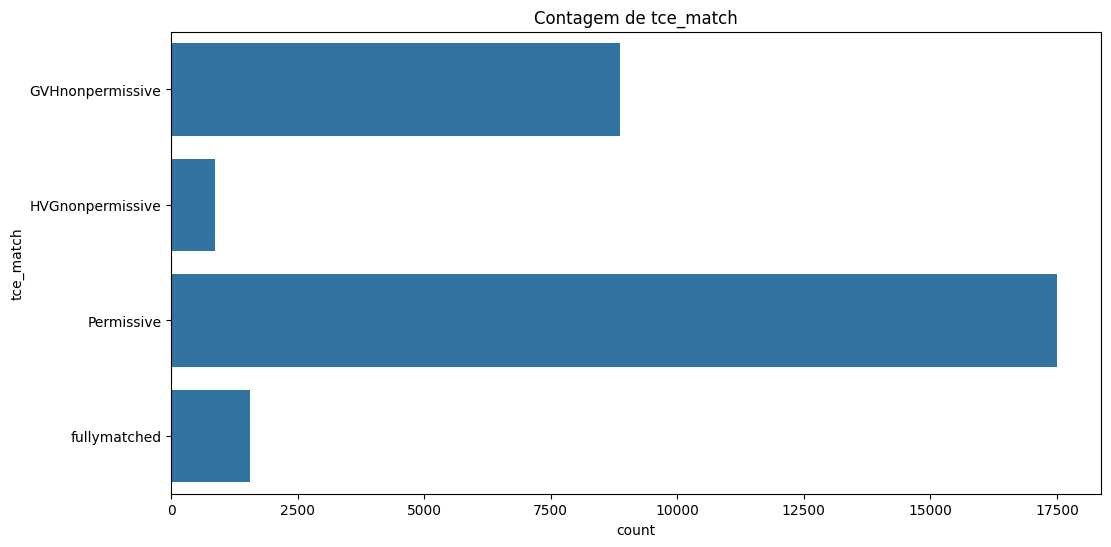

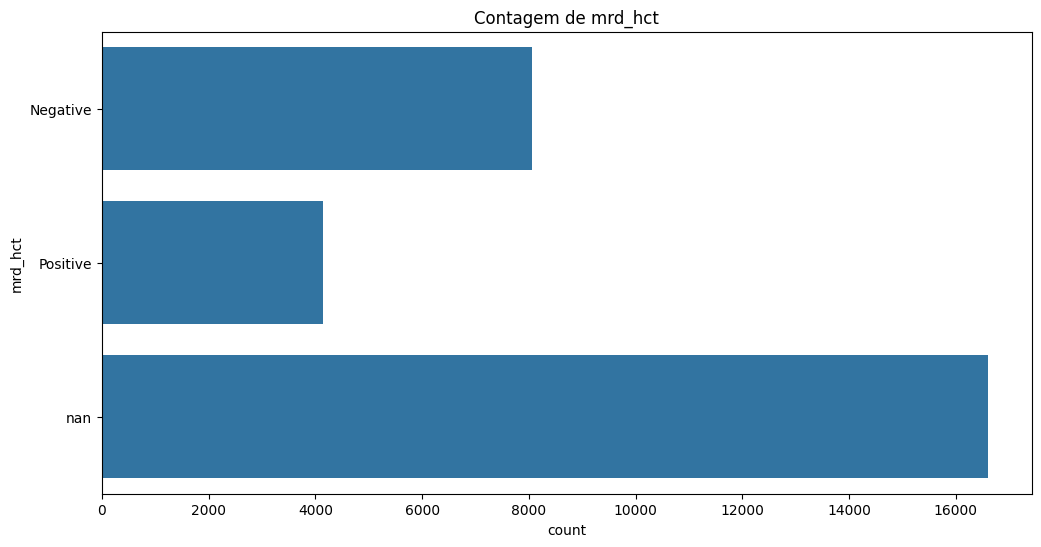

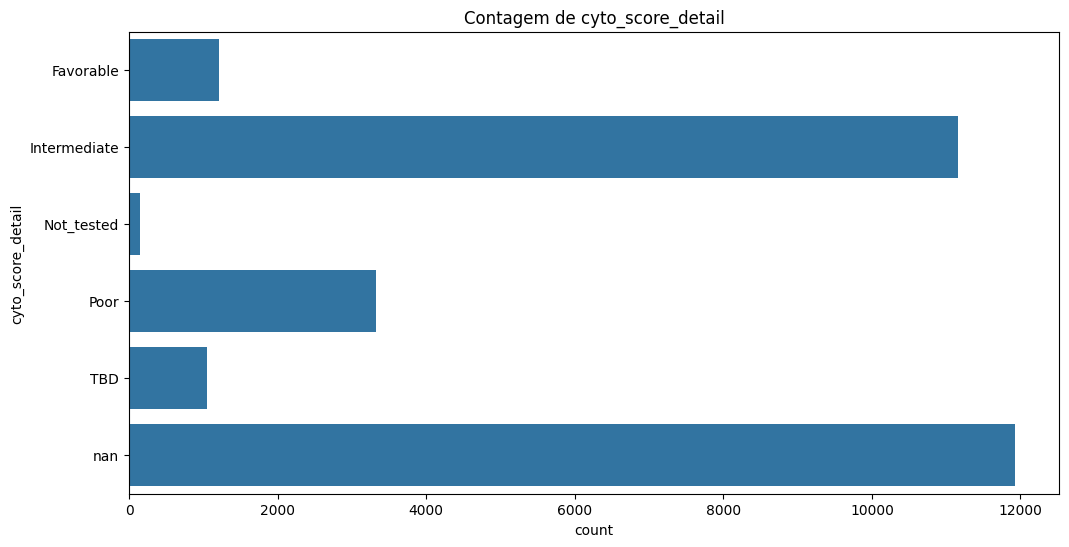

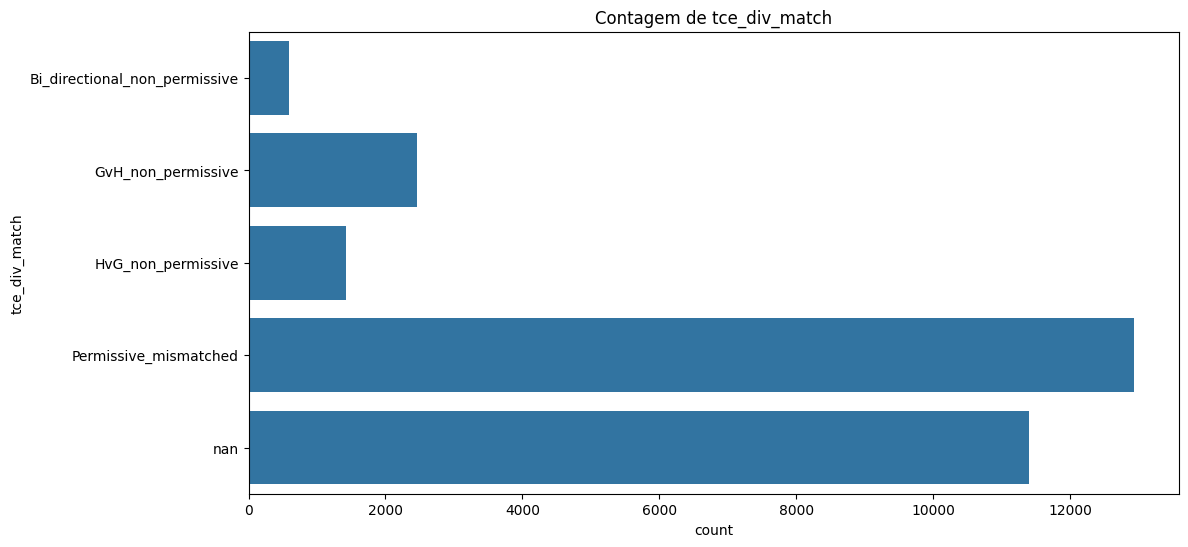

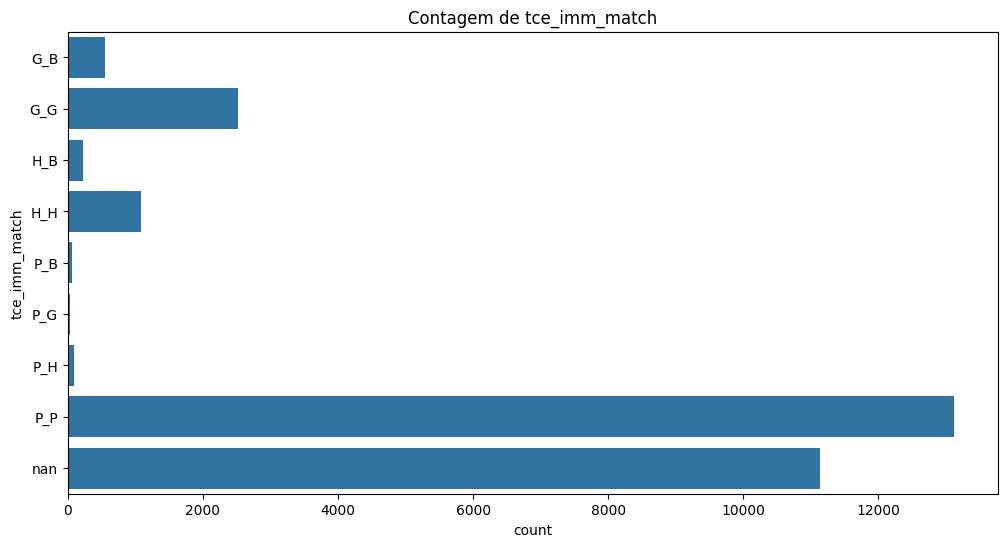

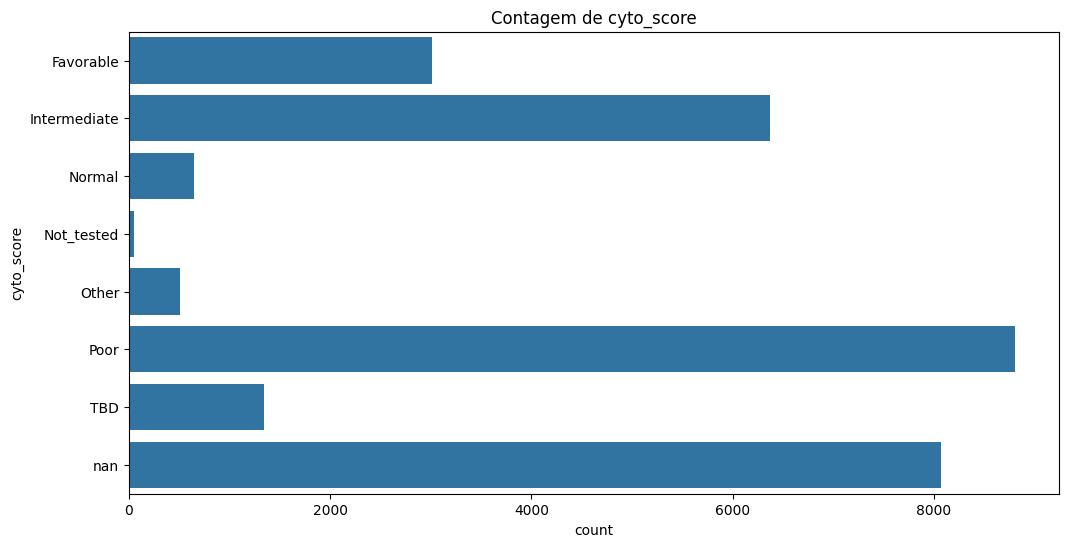

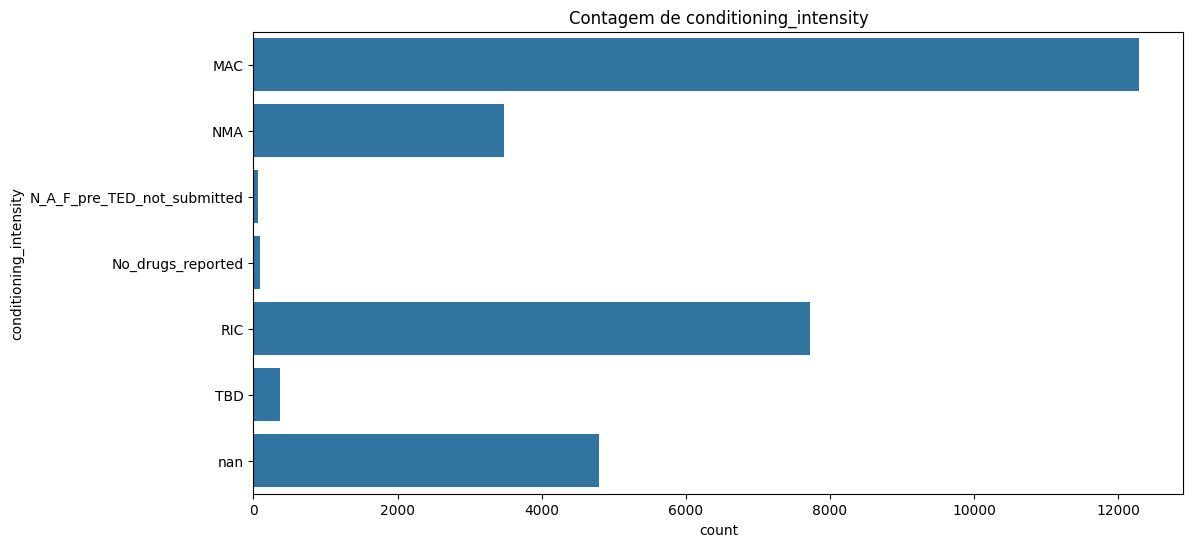

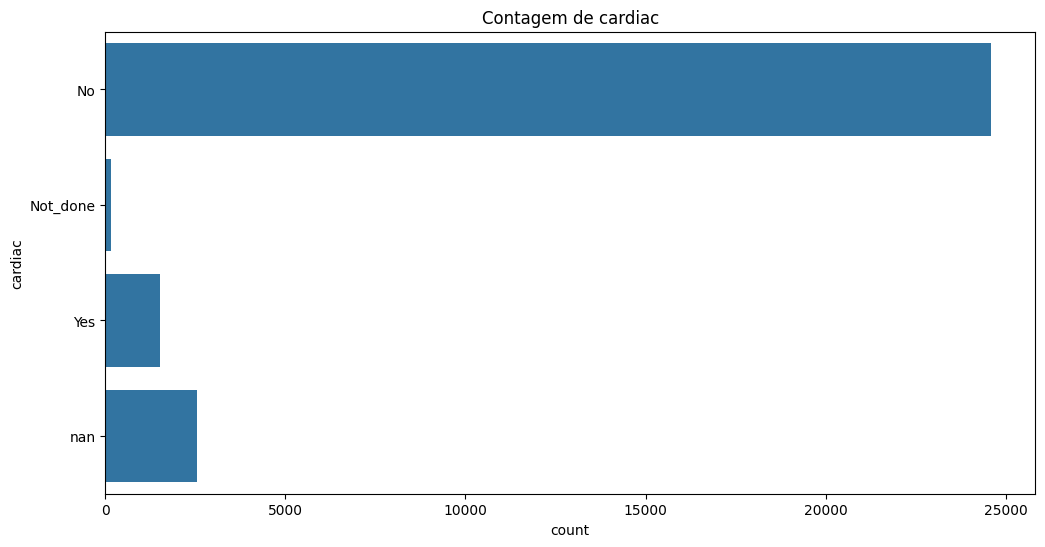

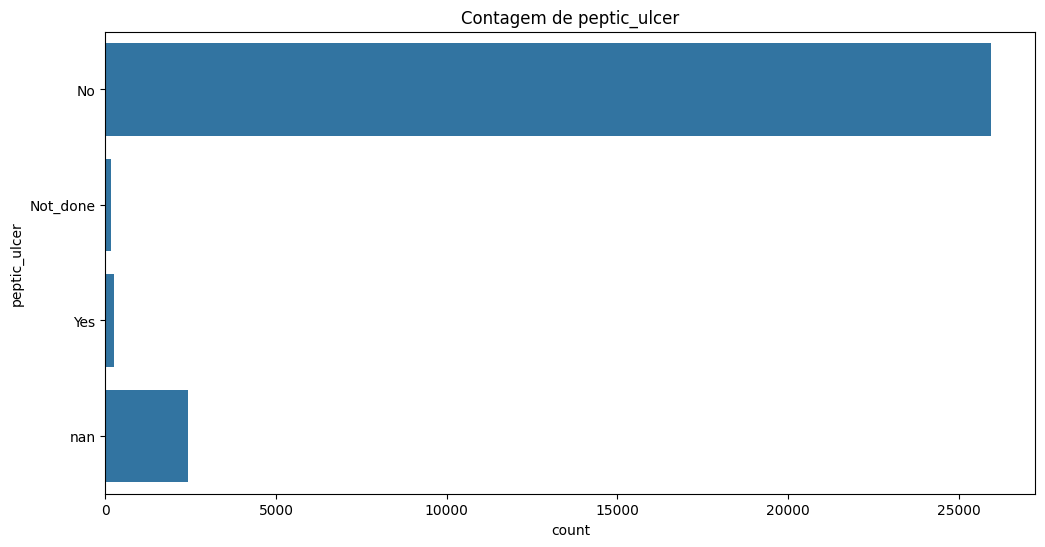

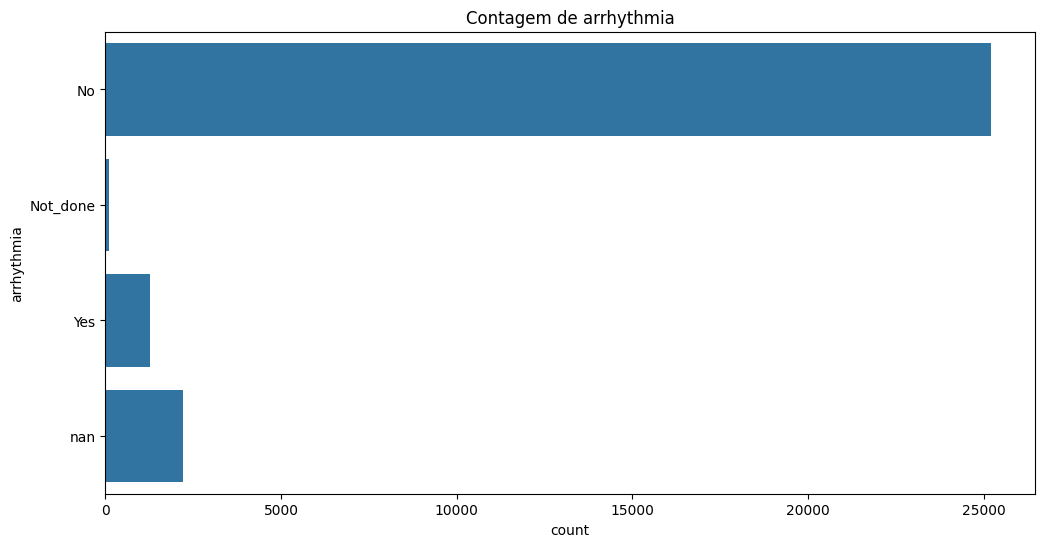

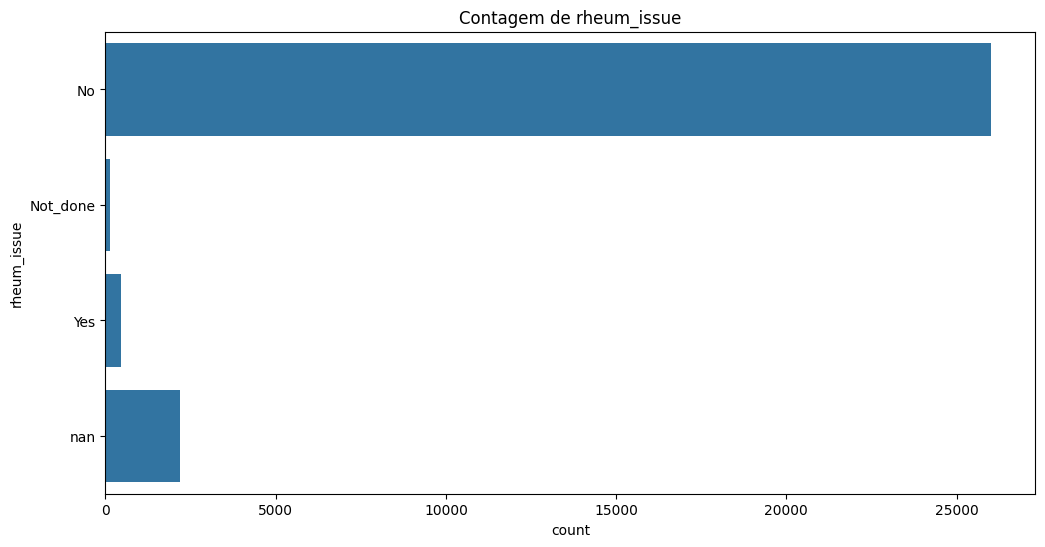

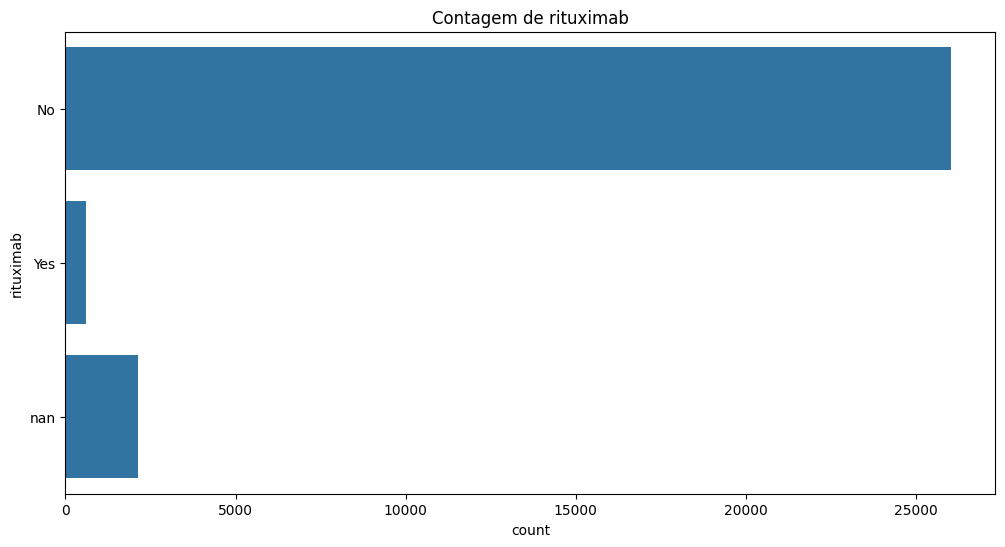

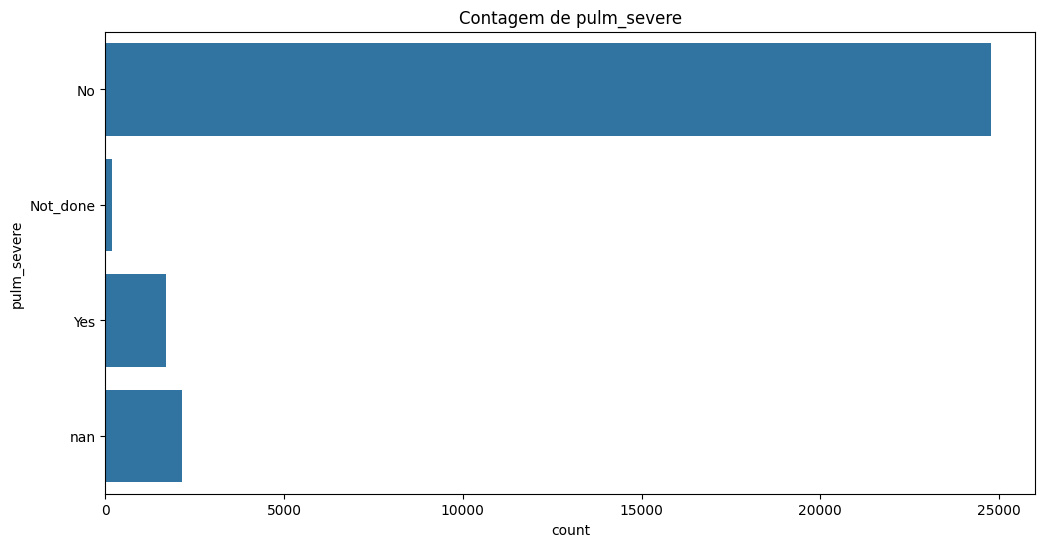

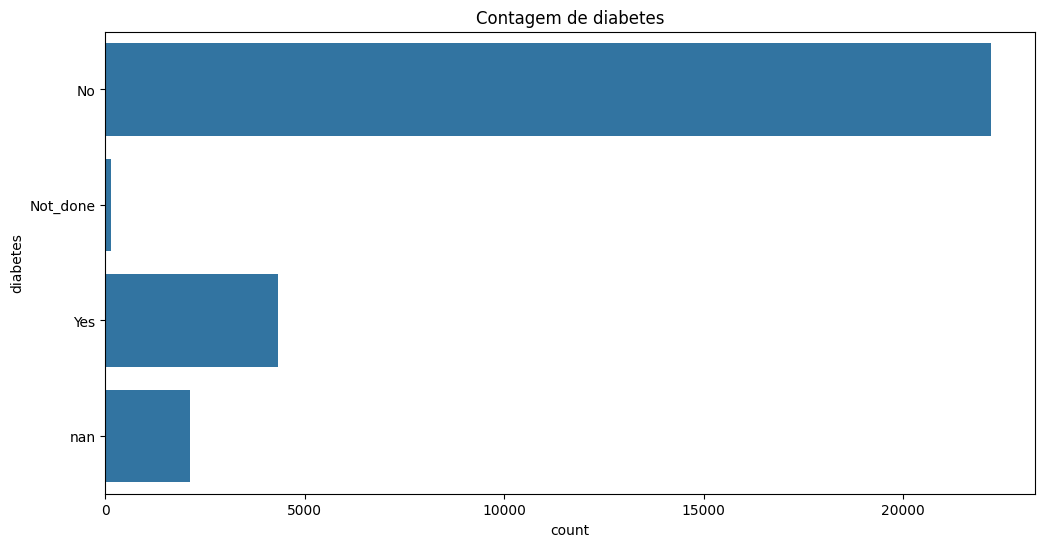

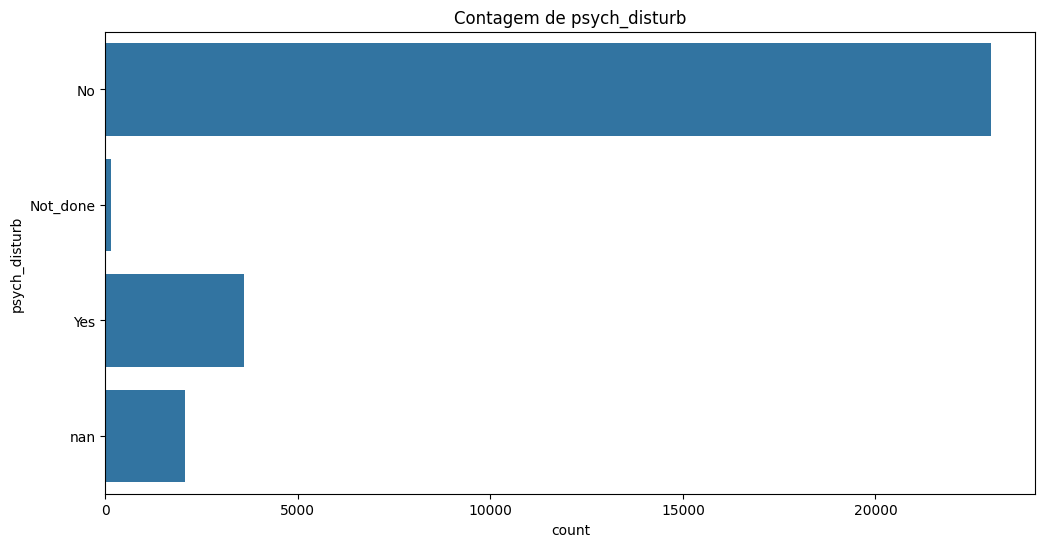

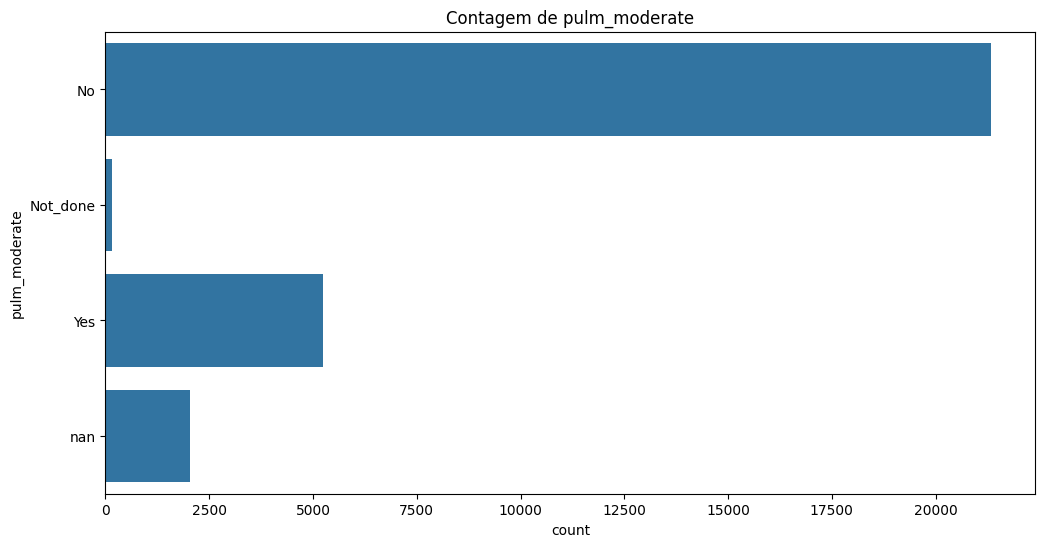

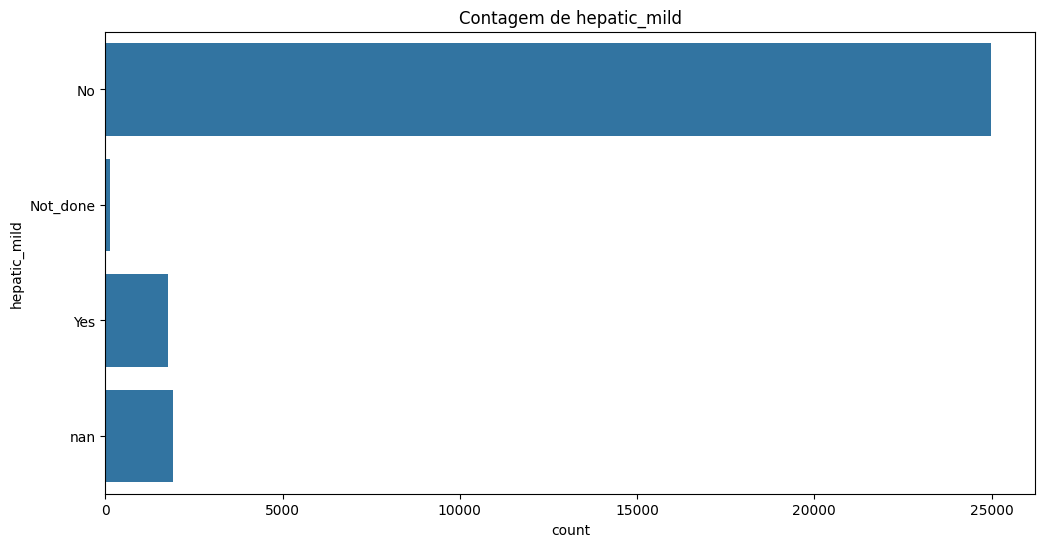

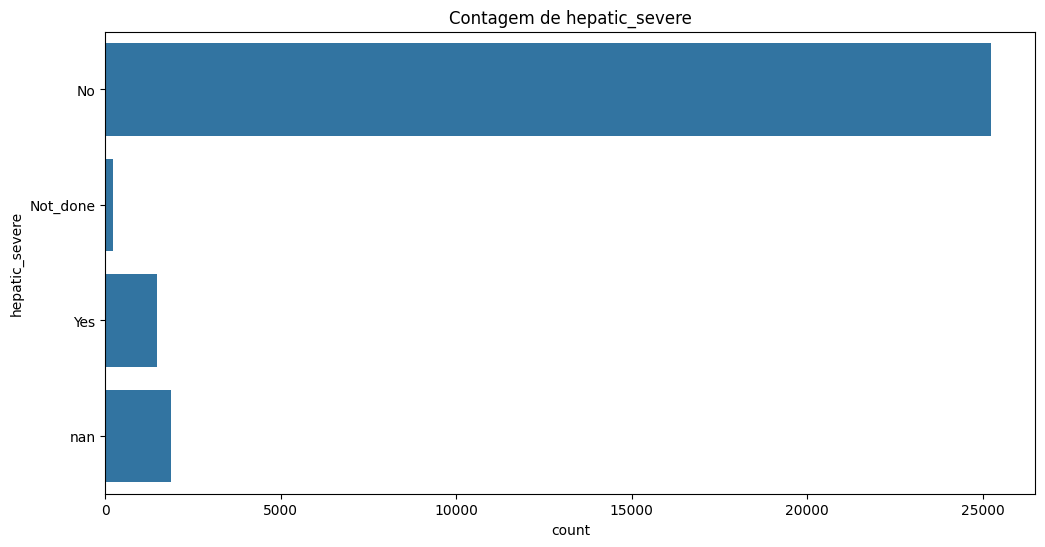

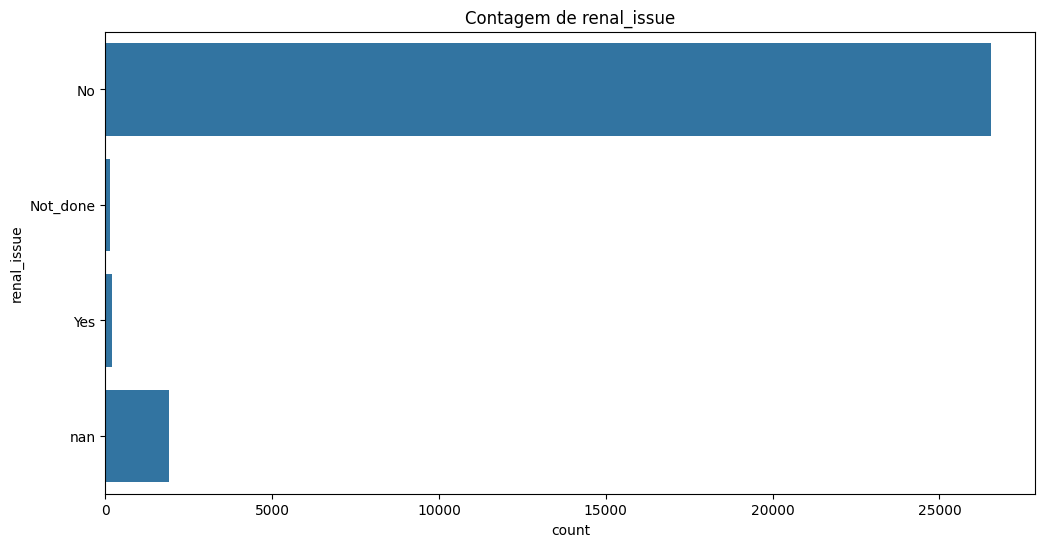

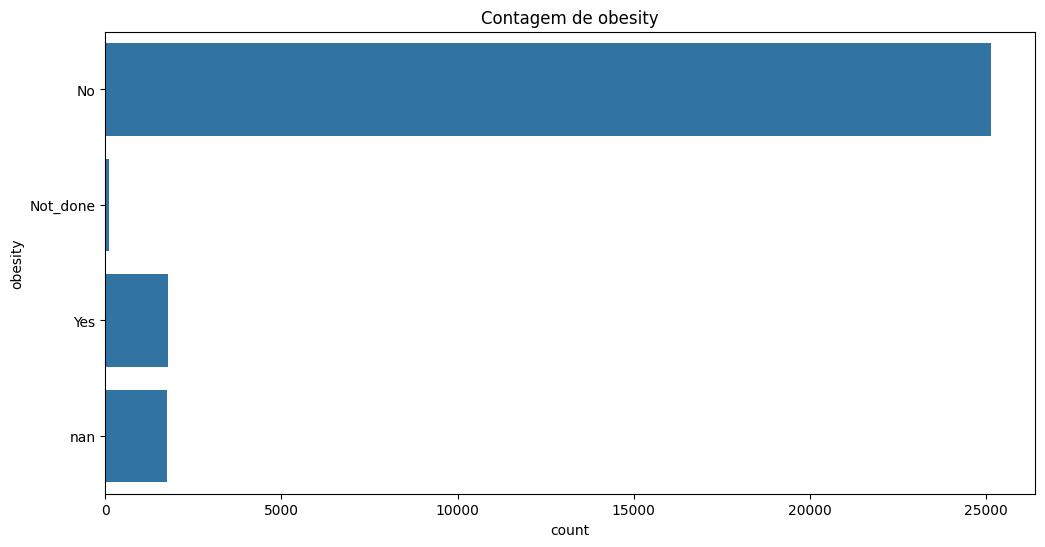

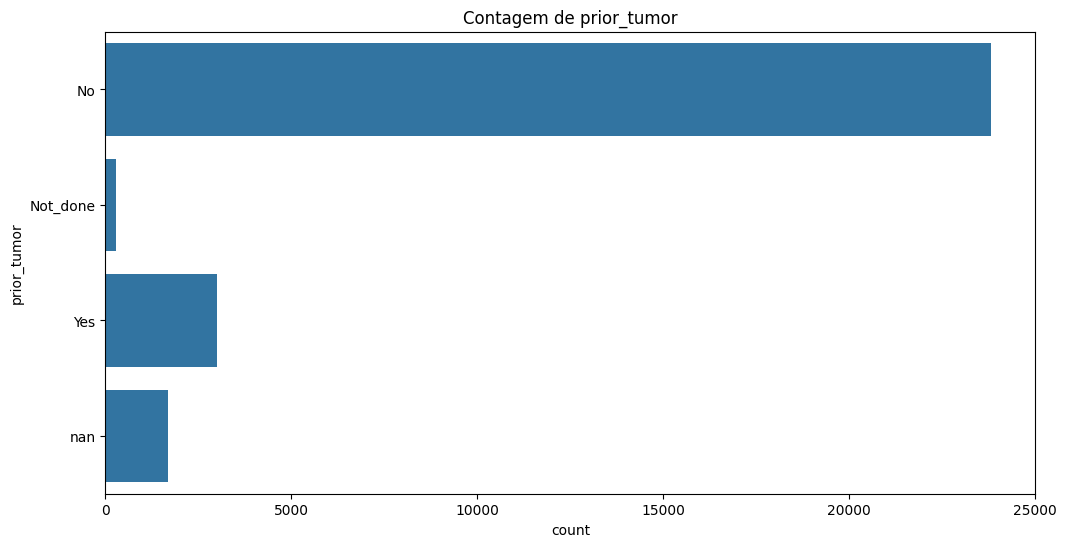

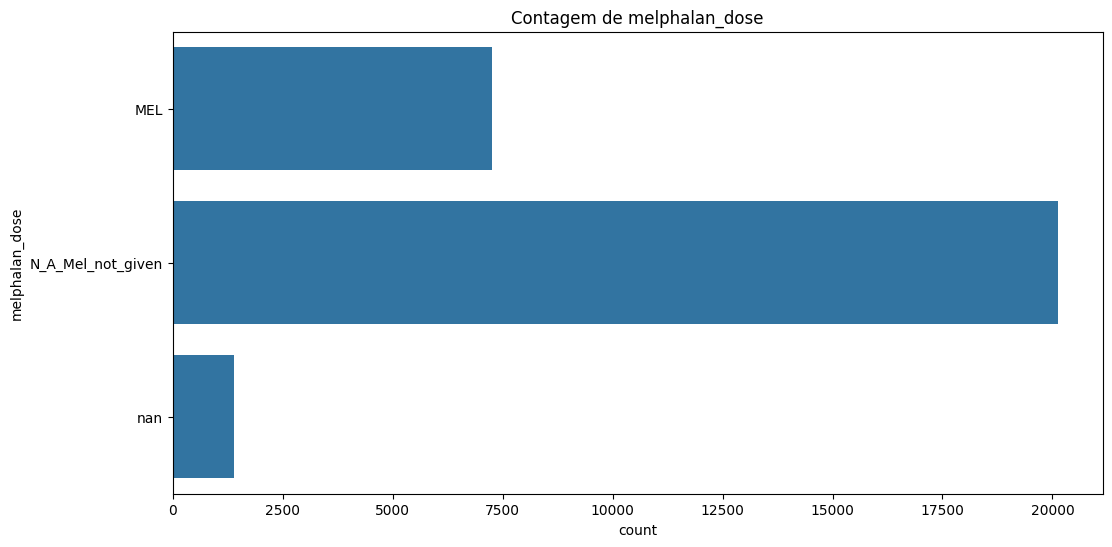

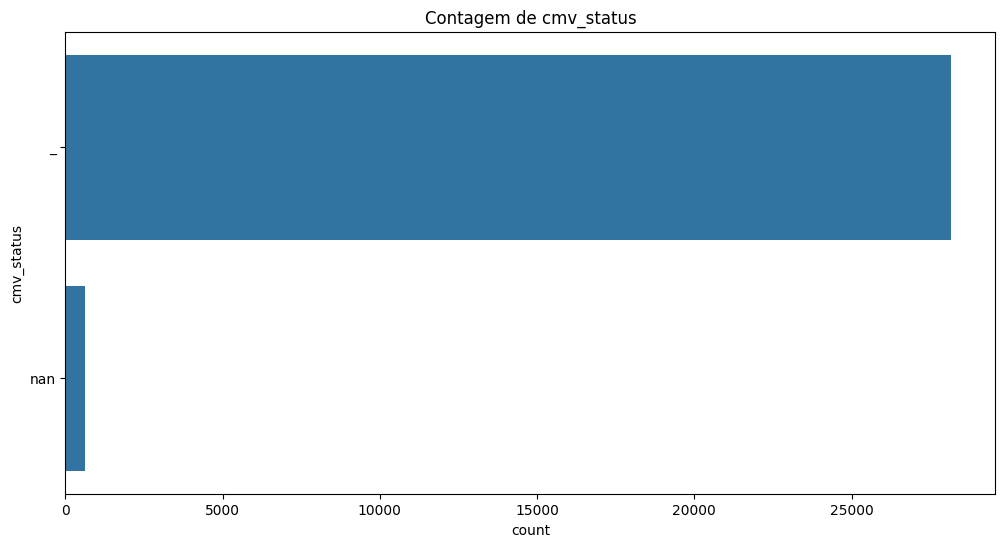

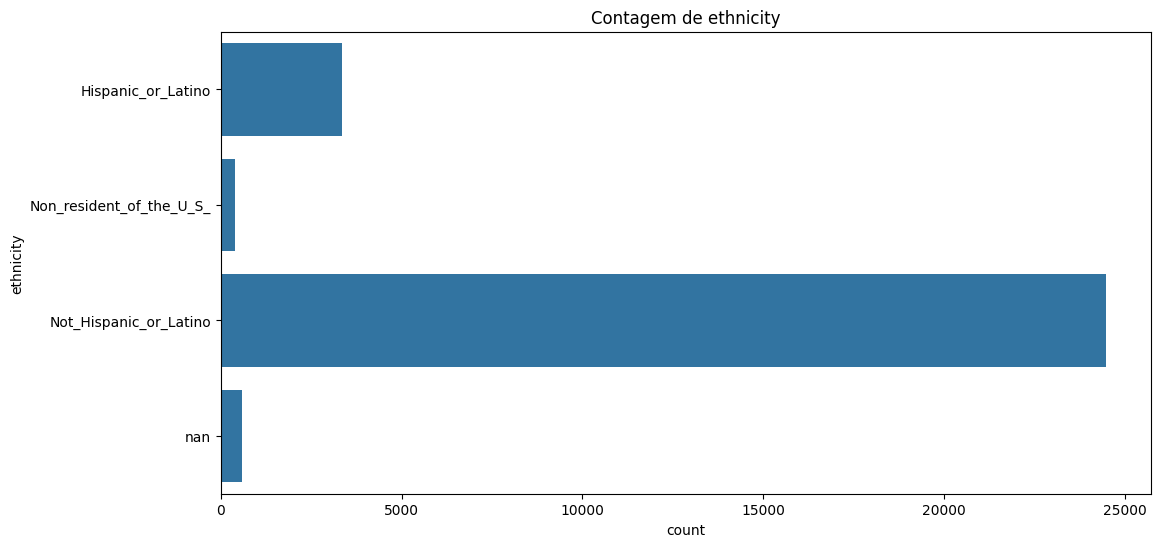

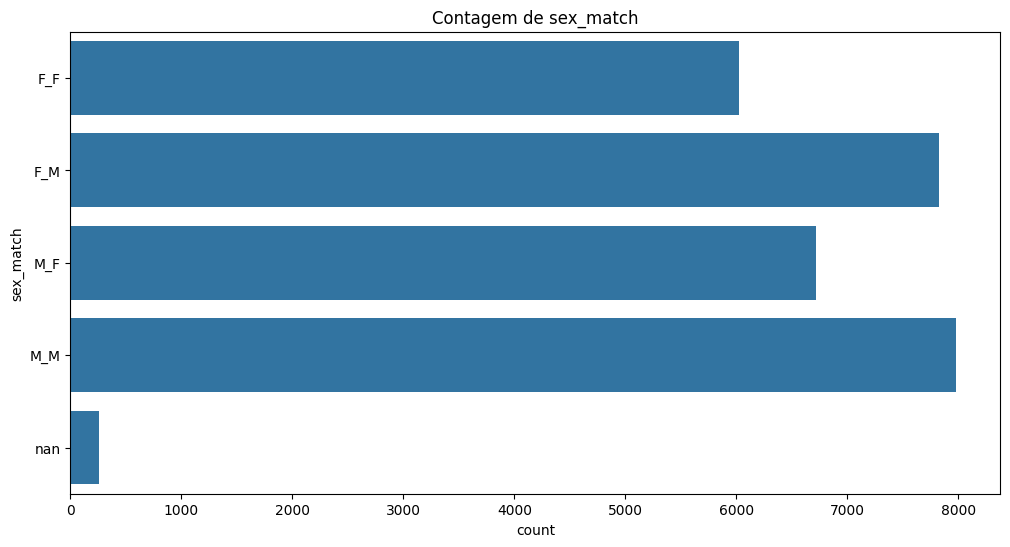

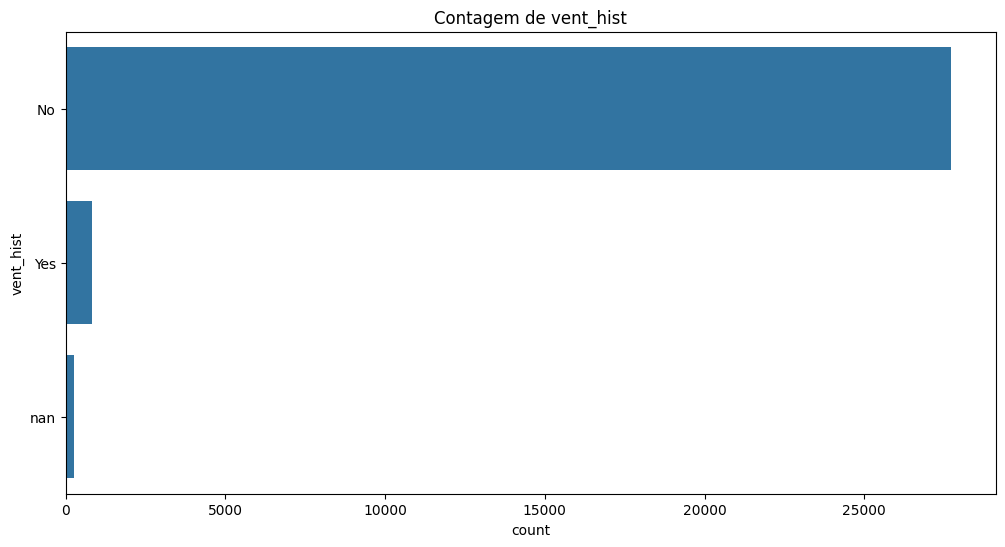

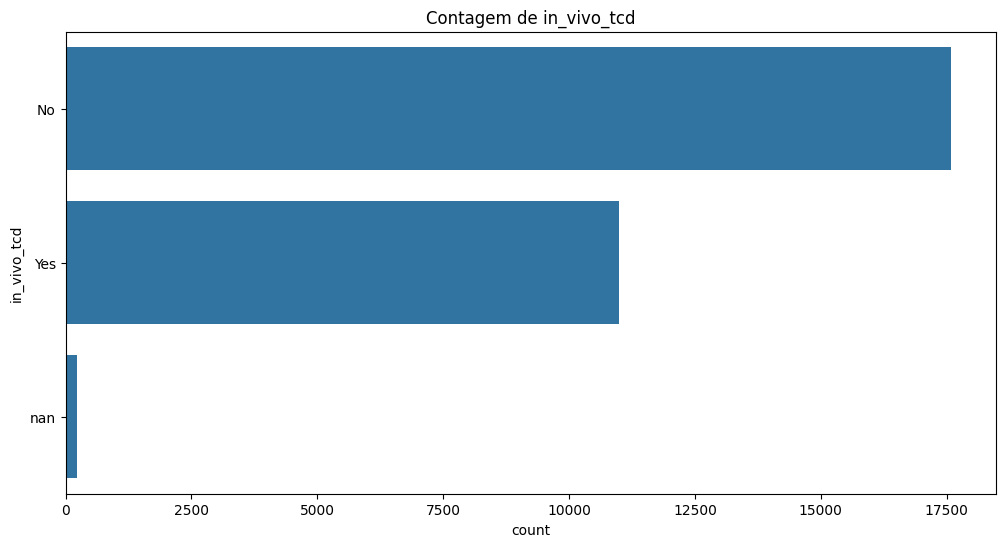

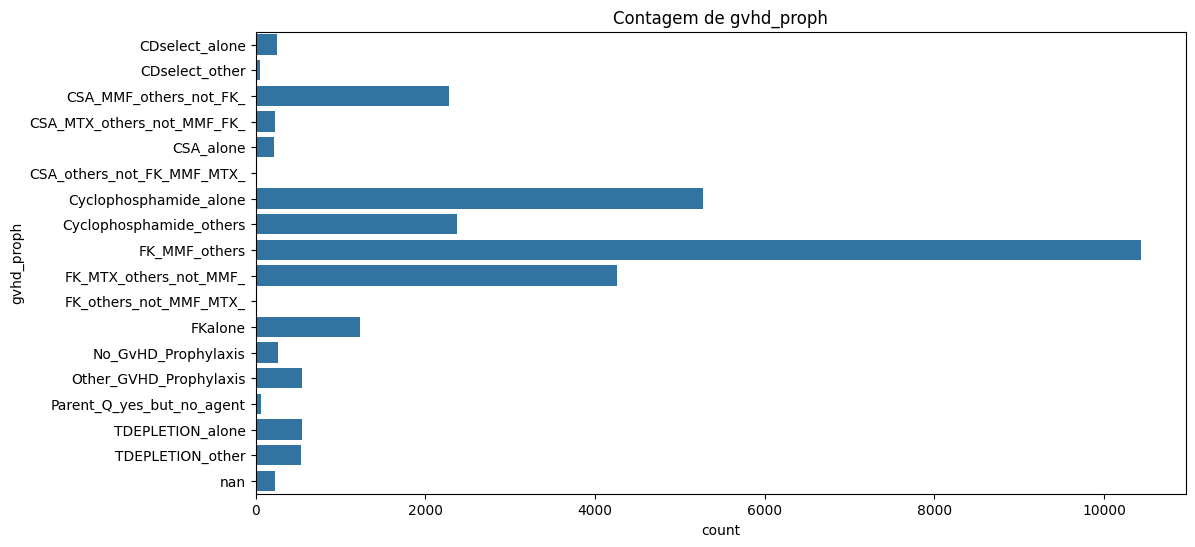

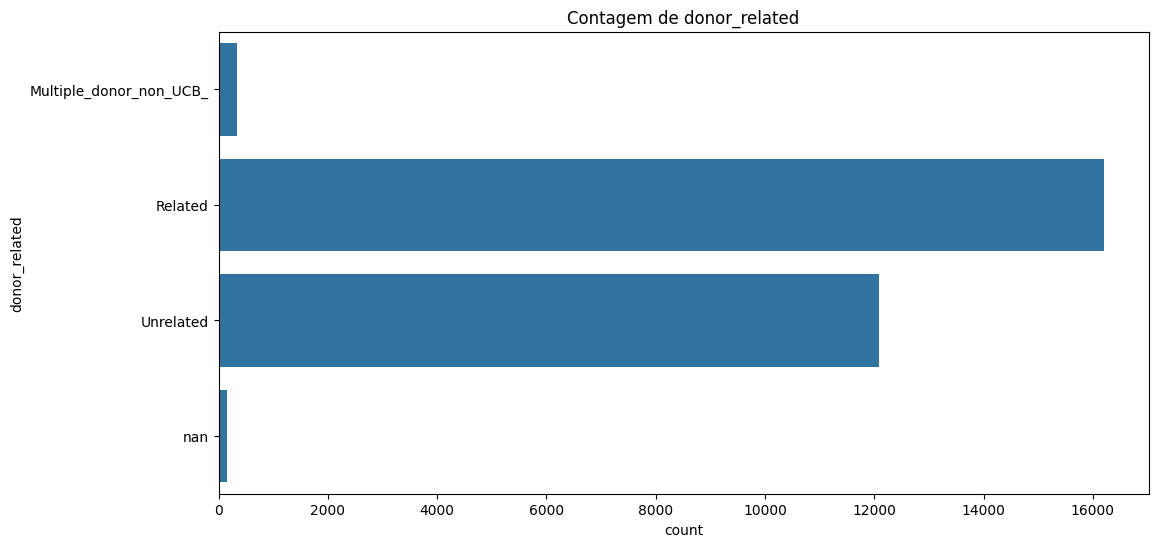

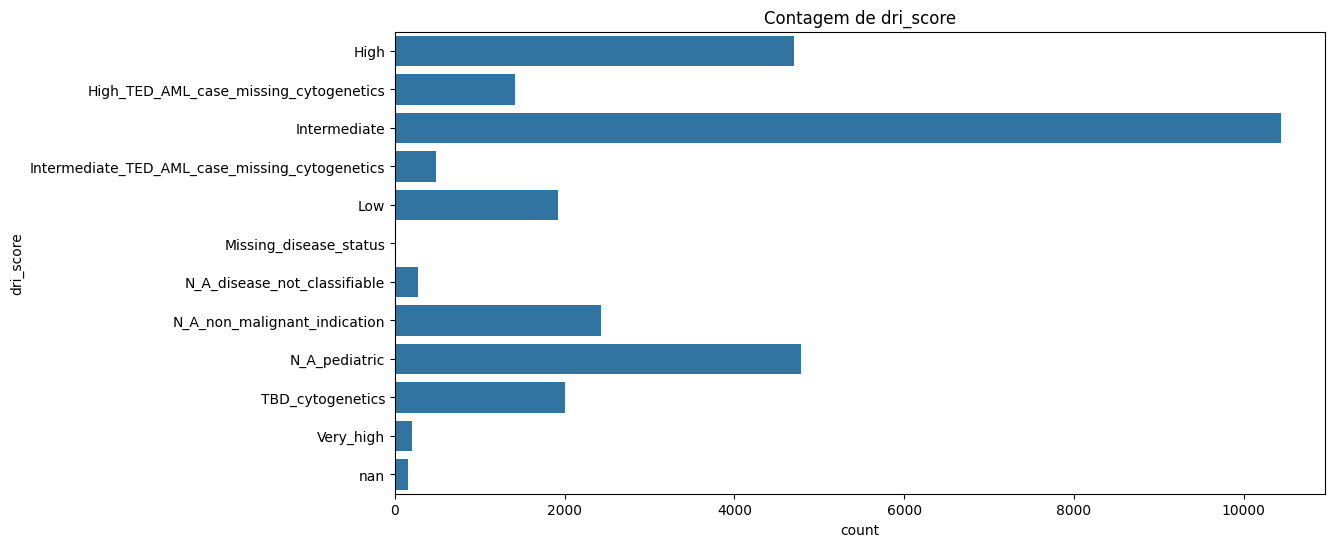

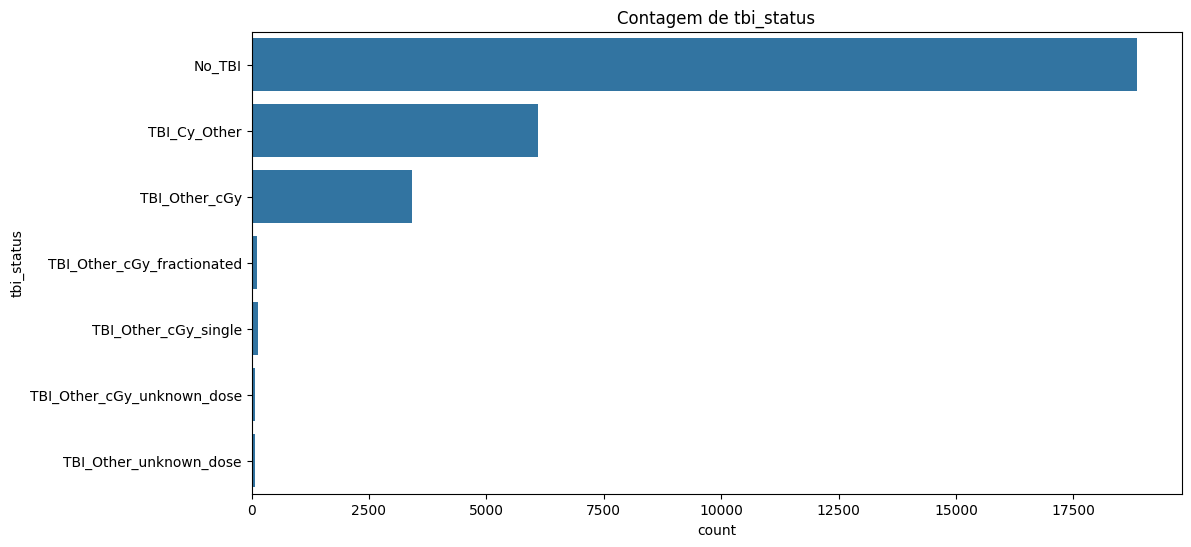

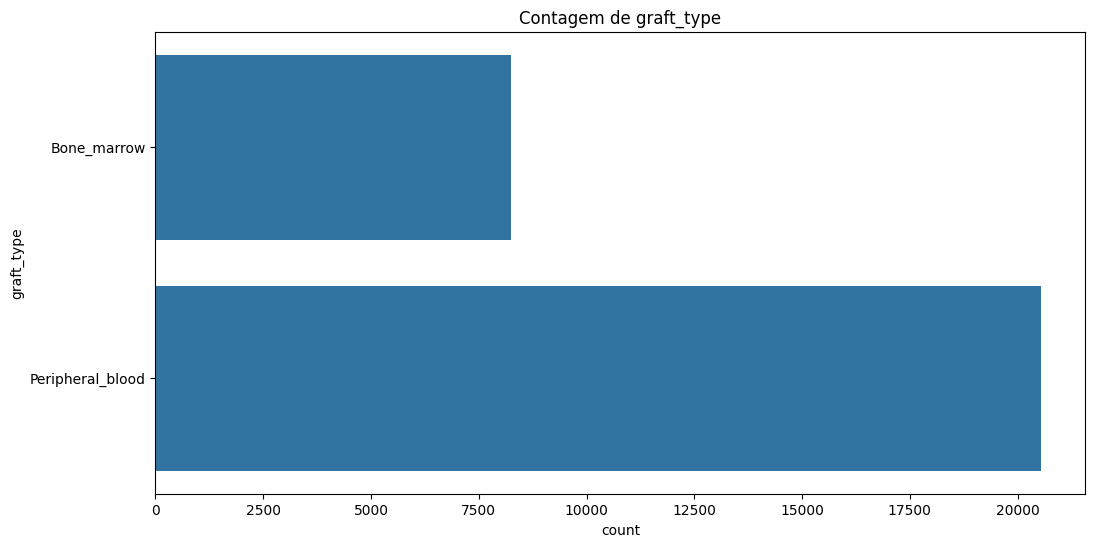

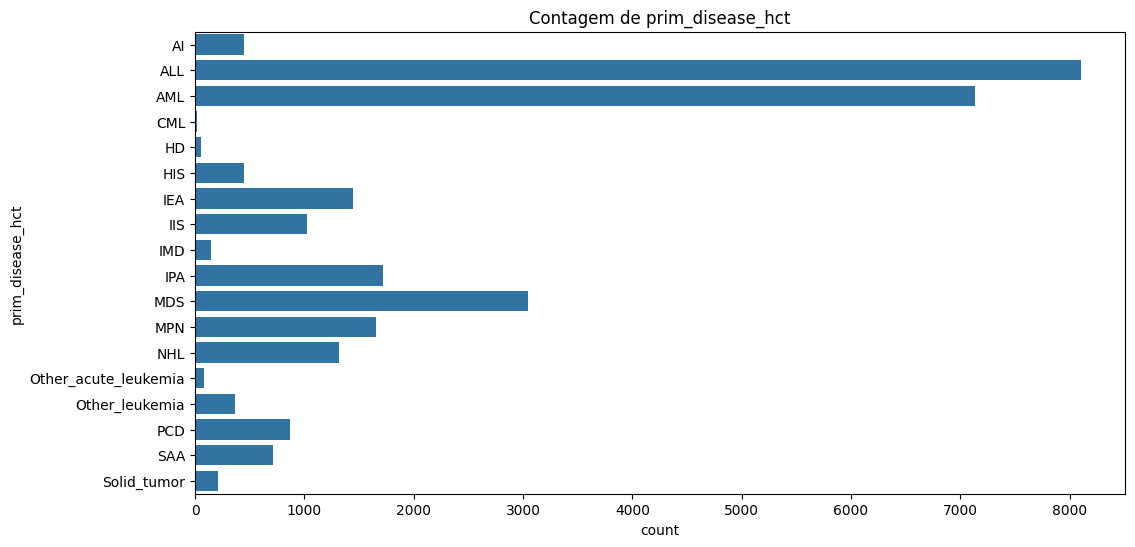

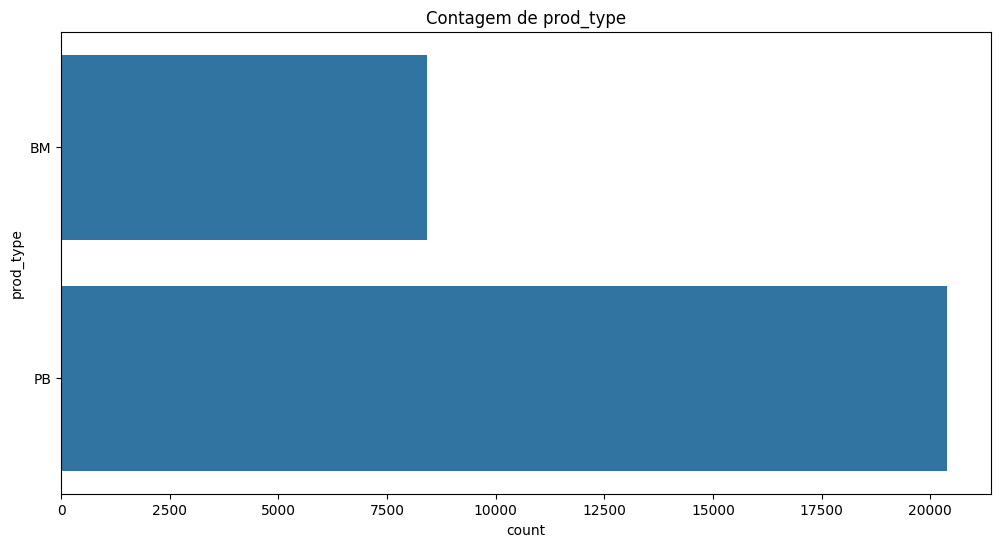

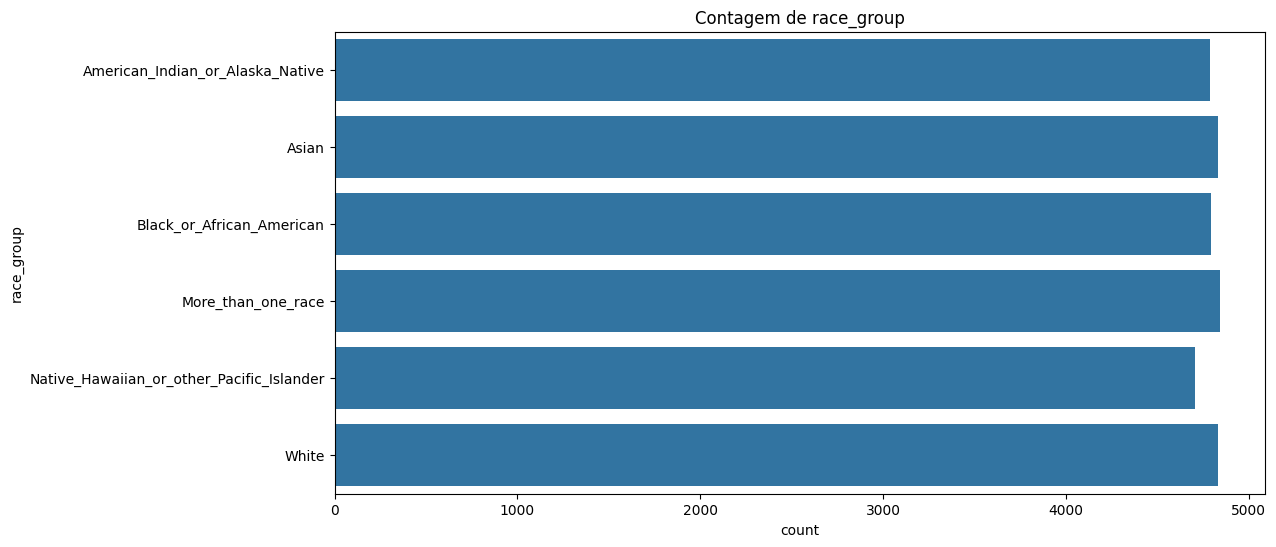

In [15]:
# Gráficos de barra para variáveis categóricas
for col in df_imputed_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df_imputed_df[col].sort_values())
    plt.title(f'Contagem de {col}')
    plt.show()

In [16]:
# Exportar para Excel usando xlsxwriter
df_imputed_df.to_excel('df_combined.xlsx', index=False, engine='xlsxwriter')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Preparar os dados para o modelo
X = df_imputed_df.drop('efs', axis=1)
y = df_imputed_df['efs']

# Treinar o modelo de RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obter a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plotar a importância das variáveis
plt.figure(figsize=(15, 10))
plt.title("Importância das Variáveis")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


In [ ]:
# Mapa de Calor (Heatmap) para variáveis numéricas
plt.figure(figsize=(16, 10))
sns.heatmap(df_imputed_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()